# TP6 - Clasificador de imágenes con red convolucional

Guarda una copia de este cuaderno en tu Google Drive para poder editarla y ejecutarla.

El propio cuaderno será tu informe del trabajo. Puedes añadir tantas secciones de código y de texto como consideres necesario para resolver todos los ejercicios propuestos y analizar los resultados obtenidos. Una vez hayas terminado, descarga el notebook en formato ipynb y súbelo a Moodle en la tarea habilitada para el TP6 con el nombre NIP_TP6_CNN.ipynb

Es **obligatorio** que se **guarden los resultados de la evaluación** de cada celda de código (para no tener que volver a ejecutarlas). Por defecto los notebooks estan configurados así (Edit→Notebook Settings → NUNCA actives: Omit code cell output when saving this notebook)

El Notebook incluye código de ejemplo para definir y entrenar una red convolucional con el dataset MNIST. Recuerda que **esta parte del trabajo se debe realizar con el dataset CIFAR 10**.

Imports necesarios para ejecutar el trabajo

In [6]:
import time
import numpy as np
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

In [7]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')
        return

    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)

    ## Loss
    fig, axs = plt.subplots(1, 2,  figsize=(12, 6))
    for l in loss_list:
        axs[0].plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        axs[0].plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))

    axs[0].set(title='Loss', xlabel='Epochs', ylabel='Loss')
    axs[0].grid()
    axs[0].legend()

    ## Accuracy
    for l in acc_list:
        axs[1].plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        axs[1].plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    axs[1].set(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')
    axs[1].grid()
    axs[1].legend()
    plt.show()

Carga del dataset MNIST

Importante observar como la organización de los datos es diferente que en el caso del perceptrón para poder aplicar bien las convoluciones

In [8]:
# LOAD MNIST
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test,  num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
# Definicion de la red convolucional
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

## Preguntas a responder de la celda anterior:

### 1.    Incluye un dibujo de la arquitectura de la red programada en la celda anterior.


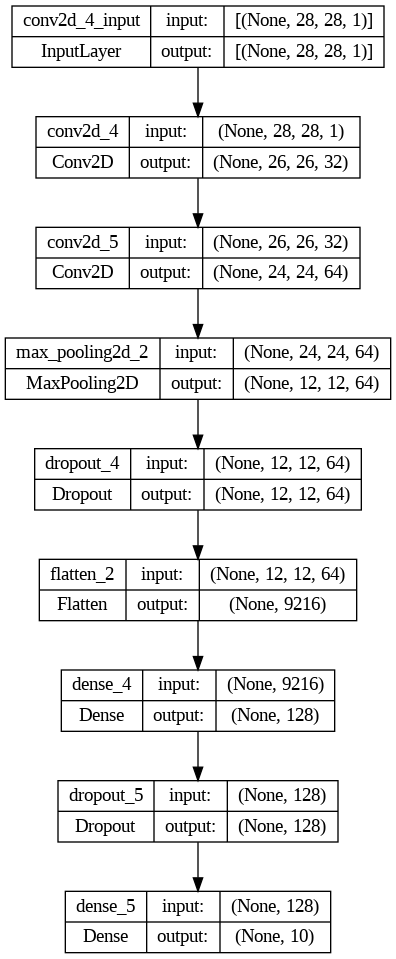

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Definición de la red convolucional
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilación del modelo
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

# Visualización de la arquitectura usando plot_model
plot_model(model, show_shapes=True, show_layer_names=True)


Input -> Conv2D (32 filters) -> Conv2D (64 filters) -> MaxPooling2D -> Dropout -> Flatten -> Dense (128 units) -> Dropout -> Dense (num_classes units) -> Output (softmax)

### 2.    Explica brevemente qué hace cada capa de la red.

Capa de Entrada (Conv2D - 32 filtros):

Operación de convolución con 32 filtros de tamaño 3x3.
Extrae características iniciales de la imagen de entrada.

Capa Conv2D (64 filtros):

Operación de convolución con 64 filtros de tamaño 3x3.
Extrae características más complejas de la imagen.

Capa MaxPooling2D:

Operación de agrupación máxima con un tamaño de grupo de (2, 2).
Reduce el tamaño espacial de la entrada, ayudando a la red a ser menos sensible a pequeñas traslaciones en la entrada.

Capa de Dropout (tasa de 0.25):

Descarta aleatoriamente el 25% de las neuronas durante el entrenamiento.
Ayuda a prevenir el sobreajuste.

Capa Flatten:

Convierte los mapas de características obtenidos de la capa de agrupación máxima en una matriz unidimensional.
Prepara los datos para las capas completamente conectadas.

Capa Densa (128 neuronas):

Capa conectada con 128 neuronas con funcion de activación ReLU.
Procesa las características extraídas por las capas anteriores.

Capa de Dropout (tasa de 0.5):

Descarta aleatoriamente el 50% de las neuronas durante el entrenamiento.
Otra medida para prevenir el sobreajuste.

Capa Densa (neuronas de salida igual al número de clases):

Capa conectada con un número de neuronas igual al número de clases.
Función de activación Softmax.
Produce las probabilidades de clase para cada entrada.

## Entrenamiento

Epoch 1/12
469/469 [==============================] - 15s 9ms/step - loss: 0.2372 - accuracy: 0.9280
Epoch 2/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0852 - accuracy: 0.9748
Epoch 3/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0658 - accuracy: 0.9805
Epoch 4/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0535 - accuracy: 0.9832
Epoch 5/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0449 - accuracy: 0.9859
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0400 - accuracy: 0.9875
Epoch 7/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0340 - accuracy: 0.9889
Epoch 8/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0328 - accuracy: 0.9895
Epoch 9/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0281 - accuracy: 0.9906
Epoch 10/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0244 - accuracy: 0.991

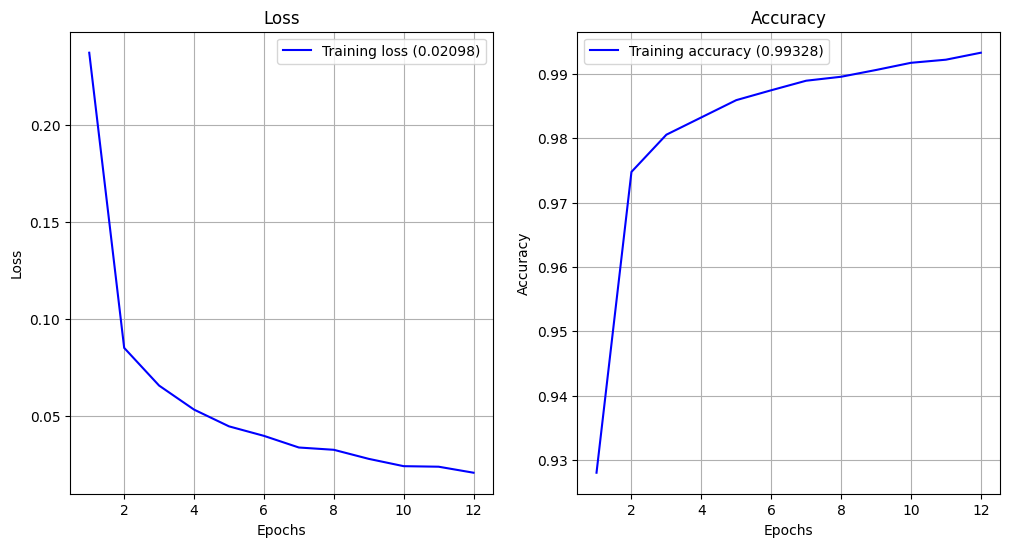

In [10]:
# Ajuste de los parámetros de la red
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=True)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_history(history)

## Preguntas a responder de la celda anterior

¿Qué diferencias observas en el entrenamiento y en los resultados en comparación con las redes diseñadas en el otro Notebook?

Que debido al uso de numerosas capas conseguimos una enorme precisión a la hora de identificar estas imágenes, es muy superior a la anterior práctica donde el maximo valor de precision obtenido era al rededor de 0.92 mientras que en este caso es 0.9926

El notebook que entregues deberá incluir:

1.   Modifica la carga de datos, y la configuración inicial de la red si lo ves necesario, para que cargue/utilice el dataset CIFAR10 en lugar de MNIST. Puedes pasar a blanco y negro las imágenes, o hacer que la red trabaje con imagenes en color (n x m x 3), y siempre, normalizar los valores (atributos con valores entre 0 y 1).
2.   Entrena un perceptrón multi-capa y evalúa los resultados que obtiene para CIFAR10. Compara estos resultados con los obtenidos en el dataset anterior (MNIST)
3.   Entrena una red convolucional y evalúa los resultados que obtiene con CIFAR10. Compara estos resultados con los obtenidos para el perceptrón.
4.   Opcional: Repite el último paso, entrenar la red convolucional, utilizando el dataset CIFAR 100, con 100 clases diferentes. En este caso, recuerda asegurarte que el Colab está utilizando una configuración con GPU.

1.   Modifica la carga de datos, y la configuración inicial de la red si lo ves necesario, para que cargue/utilice el dataset CIFAR10 en lugar de MNIST. Puedes pasar a blanco y negro las imágenes, o hacer que la red trabaje con imagenes en color (n x m x 3), y siempre, normalizar los valores (atributos con valores entre 0 y 1).

In [28]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convertir imágenes a blanco y negro (escala de grises)
# x_train = x_train.mean(axis=3, keepdims=True)
# x_test = x_test.mean(axis=3, keepdims=True)

# if K.image_data_format() == 'channels_first':
#      x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#      x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizar los valores de píxeles al rango [0, 1]
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convertir class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


2.   Entrena un perceptrón multi-capa y evalúa los resultados que obtiene para CIFAR10. Compara estos resultados con los obtenidos en el dataset anterior (MNIST)

Epoch 1/30
352/352 [==============================] - 3s 5ms/step - loss: 1.9342 - accuracy: 0.3055 - val_loss: 1.7830 - val_accuracy: 0.3696
Epoch 2/30
352/352 [==============================] - 2s 5ms/step - loss: 1.7425 - accuracy: 0.3737 - val_loss: 1.7188 - val_accuracy: 0.3998
Epoch 3/30
352/352 [==============================] - 2s 6ms/step - loss: 1.6697 - accuracy: 0.4021 - val_loss: 1.6196 - val_accuracy: 0.4192
Epoch 4/30
352/352 [==============================] - 2s 6ms/step - loss: 1.6233 - accuracy: 0.4188 - val_loss: 1.5755 - val_accuracy: 0.4452
Epoch 5/30
352/352 [==============================] - 2s 5ms/step - loss: 1.5866 - accuracy: 0.4318 - val_loss: 1.5435 - val_accuracy: 0.4590
Epoch 6/30
352/352 [==============================] - 2s 5ms/step - loss: 1.5607 - accuracy: 0.4417 - val_loss: 1.5324 - val_accuracy: 0.4624
Epoch 7/30
352/352 [==============================] - 2s 5ms/step - loss: 1.5252 - accuracy: 0.4531 - val_loss: 1.5125 - val_accuracy: 0.4720
Epoch 

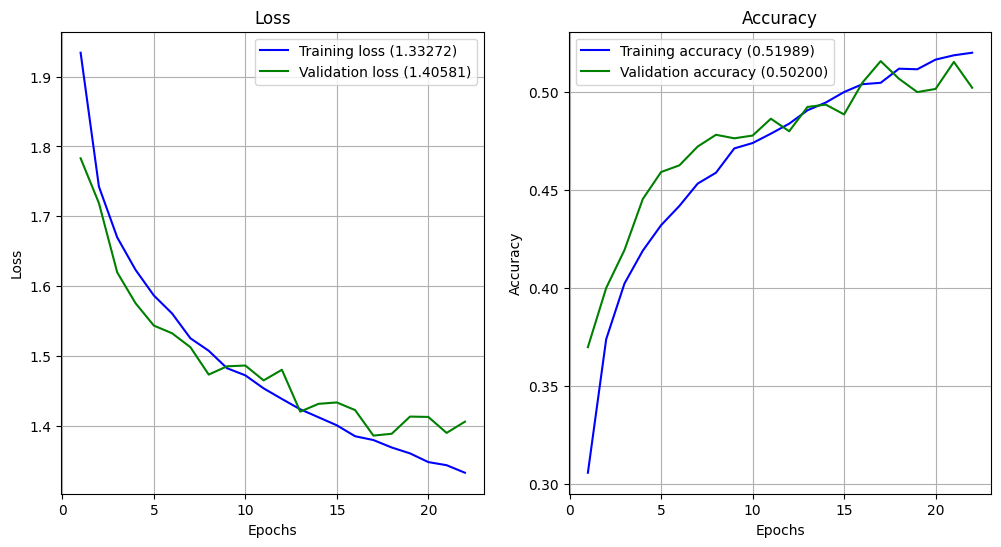

In [36]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# LOAD CIFAR10
img_rows, img_cols = 32, 32
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols * 3)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols * 3)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Transformar las etiquetas de clase a formato binario
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# Construir el modelo
model = Sequential()
model.add(Flatten(input_shape=(32*32*3,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Entrenar el modelo
t0 = time.perf_counter()
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_split=0.1,
    callbacks=[earlystop],
    verbose=True
)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_history(history)


CIFAR10 ha conseguido un valor de loss=1.403356671333313 y un valor de accuracy=0.49970000982284546
MNIST=ha conseguido un valor de loss=028260672464966774 y un valor de accuracy=0.9926999807357788.

Donde podemos ver claramente que el MNIST tiene una precision increiblemente superior al CIFAR10


3.   Entrena una red convolucional y evalúa los resultados que obtiene con CIFAR10. Compara estos resultados con los obtenidos para el perceptrón.

Epoch 26: early stopping
Model Configuration: [('Conv2D', 32, (3, 3), 'relu'), ('Conv2D', 64, (3, 3), 'relu'), ('MaxPooling2D', (2, 2)), ('Dropout', 0.25), ('Conv2D', 128, (3, 3), 'relu'), ('MaxPooling2D', (2, 2)), ('Dropout', 0.25), ('Flatten',), ('Dense', 256, 'relu'), ('Dropout', 0.5), ('Dense', 10, 'softmax')]
Test loss: 0.6854616403579712
Test accuracy: 0.7809000015258789
---


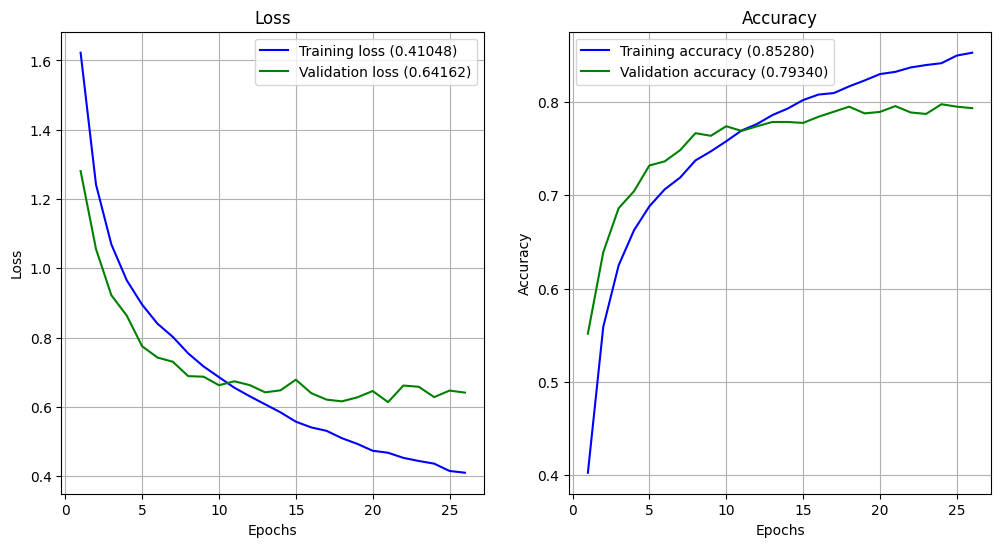

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import time

# LOAD CIFAR10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Transformar las imágenes y etiquetas
img_rows, img_cols = 32, 32
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define la función para construir y entrenar el modelo
def build_and_train_model(model_config):
    model = Sequential()
    for layer_config in model_config:
        layer_type = layer_config[0]
        if layer_type == 'Conv2D':
            model.add(Conv2D(layer_config[1], kernel_size=layer_config[2], activation=layer_config[3], input_shape=(32, 32, 3)))
        elif layer_type == 'MaxPooling2D':
            model.add(MaxPooling2D(pool_size=layer_config[1]))
        elif layer_type == 'Dropout':
            model.add(Dropout(layer_config[1]))
        elif layer_type == 'Flatten':
            model.add(Flatten())
        elif layer_type == 'Dense':
            model.add(Dense(layer_config[1], activation=layer_config[2]))

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])

    earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

    history = model.fit(
        x_train,
        y_train,
        batch_size=128,
        epochs=30,
        validation_split=0.1,
        callbacks=[earlystop],
        verbose=False
    )

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Model Configuration:', model_config)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('---')

    return history

# Define las configuraciones de los modelos
# Define las configuraciones de los modelos
model_1_config = [
    ('Conv2D', 32, (3, 3), 'relu'),
    ('Conv2D', 64, (3, 3), 'relu'),
    ('MaxPooling2D', (2, 2)),
    ('Dropout', 0.25),
    ('Flatten',),
    ('Dense', 256, 'relu'),
    ('Dropout', 0.5),
    ('Dense', 10, 'softmax')
]

model_2_config = [
    ('Conv2D', 64, (3, 3), 'relu'),
    ('MaxPooling2D', (2, 2)),
    ('Dropout', 0.25),
    ('Flatten',),
    ('Dense', 128, 'relu'),
    ('Dropout', 0.5),
    ('Dense', 10, 'sigmoid')
]

model_3_config = [
    ('Conv2D', 32, (3, 3), 'relu'),
    ('Conv2D', 64, (3, 3), 'relu'),
    ('MaxPooling2D', (2, 2)),
    ('Flatten',),
    ('Dense', 256, 'relu'),
    ('Dropout', 0.5),
    ('Dense', 10, 'sigmoid')
]

model_4_config = [
    ('Conv2D', 32, (3, 3), 'relu'),
    ('MaxPooling2D', (2, 2)),
    ('Dropout', 0.25),
    ('Flatten',),
    ('Dense', 128, 'relu'),
    ('Dropout', 0.5),
    ('Dense', 10, 'softmax')
]
model_5_config = [
    ('Conv2D', 32, (3, 3), 'relu'),
    ('Conv2D', 64, (3, 3), 'relu'),
    ('MaxPooling2D', (2, 2)),
    ('Dropout', 0.25),
    ('Conv2D', 128, (3, 3), 'relu'),
    ('MaxPooling2D', (2, 2)),
    ('Dropout', 0.25),
    ('Flatten',),
    ('Dense', 256, 'relu'),
    ('Dropout', 0.5),
    ('Dense', 10, 'softmax')
]
model_6_config = [
    ('Conv2D', 32, (3, 3), 'relu'),
    ('Conv2D', 64, (3, 3), 'relu'),
    ('MaxPooling2D', (2, 2)),
    ('Dropout', 0.25),
    ('Flatten',),
    ('Dense', 500, 'relu'),
    ('Dropout', 0.75),
    ('Dense', num_classes, 'softmax')
]



# Puedes completar las configuraciones de los demás modelos según tus especificaciones

# Entrenar y evaluar cada modelo
#history_1 = build_and_train_model(model_1_config)
#history_2 = build_and_train_model(model_2_config)
#history_3 = build_and_train_model(model_3_config)
#history_4 = build_and_train_model(model_4_config)
history_5=build_and_train_model(model_5_config)
#history_6=build_and_train_model(model_6_config)

# Visualizar la historia de entrenamiento de cada modelo
#plot_history(history_1)
#plot_history(history_2)
#plot_history(history_3)
#plot_history(history_4)
plot_history(history_5)
#plot_history(history_6)

| Modelo                                                                              | Configuración de Capas                                 | Pérdida / Precisión  |
|--------------------------------------------------------------------------------------|--------------------------------------------------------|------------------------|
| Modelo 1                                                                            | Conv2D 32-3x3-relu, Conv2D 64-3x3-relu, MaxPooling2D 2x2, Dropout 0.25, Flatten, Dense 256-relu, Dropout 0.5, Dense 10-softmax, Adam | 0.9295496344566345 / 0.7106999754905701              |
| Modelo 2                                                                            | Conv2D 64-3x3-relu, MaxPooling2D 2x2, Dropout 0.25, Flatten, Dense 128-relu, Dropout 0.5, Dense 10-sigmoid, Adam               | 0.9978660345077515 / 0.6478999853134155              |
| Modelo 3                                                                            | Conv2D 32-3x3-relu, Conv2D 64-3x3-relu, MaxPooling2D 2x2, Flatten, Dense 256-relu, Dropout 0.5, Dense 10-sigmoid, Adam               | 0.9753454923629761 / 0.7024999856948853              |
| Modelo 4                                                                            | Conv2D 32-3x3-relu, MaxPooling2D 2x2, Dropout 0.25, Flatten, Dense 128-relu, Dropout 0.5, Dense 10-softmax, Adam               | 0.9829294681549072 / 0.6556000113487244              |
| Modelo 5                                                                            | Conv2D 32-3x3-relu, Conv2D 64-3x3-relu, MaxPooling2D 2x2, Dropout 0.25, Conv2D 128-3x3-relu, MaxPooling2D 2x2, Dropout 0.25, Flatten, Dense 256-relu, Dropout 0.5, Dense 10-softmax, Adam | 0.6854616403579712 / 0.7809000015258789           |
| Modelo 6                                                                            | Conv2D 32-3x3-relu, Conv2D 64-3x3-relu, MaxPooling2D 2x2, Dropout 0.25, Flatten, Dense 500-relu, Dropout 0.75, Dense 10-softmax, Adam | 0.8403907418251038 / 0.7207000255584717           |
